![1](https://github.com/zotroneneis/machine_learning_basics/raw/c21753daa38c6f321a97942a721751ff7cbedd91/figures/neural_net.png)


# with one hidden layer
categorical cross-entropy. :
![s](https://render.githubusercontent.com/render/math?math=J%28%5Cboldsymbol%7Bw%7D%2Cb%29%20%3D%20-%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%3D1%7D%5Em%20%5CBig%5B%20y%5E%7B%28i%29%7D%20%5Clog%28%5Chat%7By%7D%5E%7B%28i%29%7D%29%20%2B%20%281%20-%20y%5E%7B%28i%29%7D%29%20%5Cbig%281%20-%20%5Clog%28%5Chat%7By%7D%5E%7B%28i%29%7D%29%5Cbig%29%20%5CBig%5D&mode=display)

[source](https://github.com/zotroneneis/machine_learning_basics/blob/master/simple_neural_net.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

UsageError: Line magic function `%` not found.


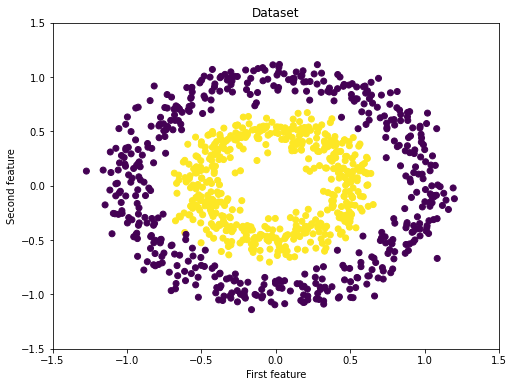

In [2]:

X, y = make_circles(n_samples=1000, factor=0.5, noise=.1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
y_true = y[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [5]:
class NeuralNet():
    
    def __init__(self, n_inputs, n_outputs, n_hidden):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.hidden = n_hidden

        # Initialize weight matrices and bias vectors
        self.W_h = np.random.randn(self.n_inputs, self.hidden)
        self.b_h = np.zeros((1, self.hidden))
        self.W_o = np.random.randn(self.hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def forward_pass(self, X):
        """
        Propagates the given input X forward through the net.

        Returns:
            A_h: matrix with activations of all hidden neurons for all input examples
            O_h: matrix with outputs of all hidden neurons for all input examples
            A_o: matrix with activations of all output neurons for all input examples
            O_o: matrix with outputs of all output neurons for all input examples
        """
        # Compute activations and outputs of hidden units
        A_h = np.dot(X, self.W_h) + self.b_h
        O_h = np.tanh(A_h)

        # Compute activations and outputs of output units
        A_o = np.dot(O_h, self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)

        outputs = {
                "A_h": A_h,
                "A_o": A_o,
                "O_h": O_h,
                "O_o": O_o,
                }

        return outputs


    def cost(self, y_true, y_predict, n_samples):
        """
        Computes and returns the cost over all examples
        """
        # same cost function as in logistic regression
        cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)

        return cost

    def backward_pass(self,  X, Y, n_samples, outputs):
        """
        Propagates the errors backward through the net.

        Returns:
            dW_h: partial derivatives of loss function w.r.t hidden weights
            db_h: partial derivatives of loss function w.r.t hidden bias
            dW_o: partial derivatives of loss function w.r.t output weights
            db_o: partial derivatives of loss function w.r.t output bias
        """

        dA_o = (outputs["O_o"] - Y)
        dW_o = (1 / n_samples) * np.dot(outputs["O_h"].T, dA_o)
        db_o = (1 / n_samples) * np.sum(dA_o)

        dA_h = (np.dot(dA_o, self.W_o.T)) * (1 - np.power(outputs["O_h"], 2))
        dW_h = (1 / n_samples) * np.dot(X.T, dA_h)
        db_h = (1 / n_samples) * np.sum(dA_h)

        gradients = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }

        return gradients

    def update_weights(self, gradients, eta):
        """
        Updates the model parameters using a fixed learning rate
        """
        self.W_o = self.W_o - eta * gradients["dW_o"]
        self.W_h = self.W_h - eta * gradients["dW_h"]
        self.b_o = self.b_o - eta * gradients["db_o"]
        self.b_h = self.b_h - eta * gradients["db_h"]

    def train(self, X, y, n_iters=500, eta=0.3):
        """
        Trains the neural net on the given input data
        """
        n_samples, _ = X.shape

        for i in range(n_iters):
            outputs = self.forward_pass(X)
            cost = self.cost(y, outputs["O_o"], n_samples=n_samples)
            gradients = self.backward_pass(X, y, n_samples, outputs)

            if i % 100 == 0:
                print(f'Cost at iteration {i}: {np.round(cost, 4)}')

            self.update_weights(gradients, eta)


    def predict(self, X):
        """
        Computes and returns network predictions for given dataset
        """
        outputs = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]

        return np.array(y_pred)[:, np.newaxis]

In [6]:

nn = NeuralNet(n_inputs=2, n_hidden=6, n_outputs=1)
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')
print()

print("Training:")
nn.train(X_train, y_train, n_iters=2000, eta=0.7)

Shape of weight matrices and bias vectors:
W_h shape: (2, 6)
b_h shape: (1, 6)
W_o shape: (6, 1)
b_o shape: (1, 1)

Training:
Cost at iteration 0: 1.0872
Cost at iteration 100: 0.2723
Cost at iteration 200: 0.1712
Cost at iteration 300: 0.1386
Cost at iteration 400: 0.1208
Cost at iteration 500: 0.1084
Cost at iteration 600: 0.0986
Cost at iteration 700: 0.0907
Cost at iteration 800: 0.0841
Cost at iteration 900: 0.0785
Cost at iteration 1000: 0.0739
Cost at iteration 1100: 0.0699
Cost at iteration 1200: 0.0665
Cost at iteration 1300: 0.0635
Cost at iteration 1400: 0.061
Cost at iteration 1500: 0.0587
Cost at iteration 1600: 0.0566
Cost at iteration 1700: 0.0547
Cost at iteration 1800: 0.0531
Cost at iteration 1900: 0.0515


In [7]:

n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 98.4 %


In [8]:
X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp = np.ravel(y_predict_temp)

Text(0.5, 1.0, 'Decision boundary')

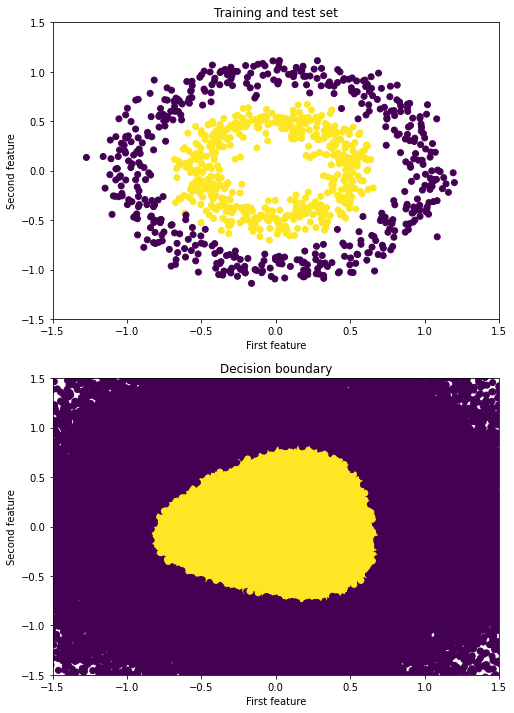

In [9]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")

# perceptron

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

UsageError: Line magic function `%` not found.


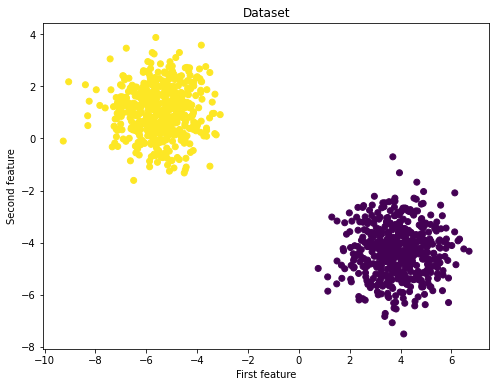

In [11]:

X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [12]:

y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [13]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

In [14]:
p = Perceptron()
w_trained, b_trained = p.train(X_train, y_train,learning_rate=0.05, n_iters=500)

y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


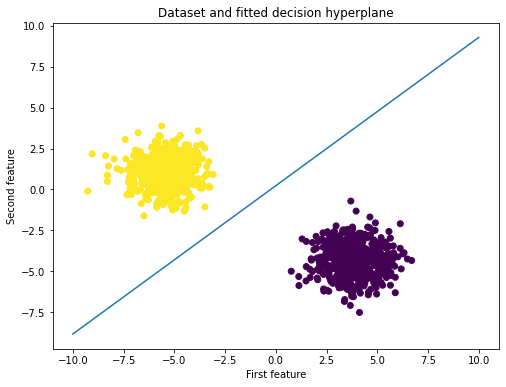

In [15]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()
    
plot_hyperplane(X, y, w_trained, b_trained)